# 1)

# 2 Regular Expressions Module

1. Initialize a variable python_mentions with the integer value 0.

1. Create a string — pattern — containing a regular expression pattern that uses a set to match Python or python.

1. Use a loop to iterate over each item in the titles list, and for each item:
    - Use the re.search() function to check whether pattern matches the title.
    - If re.search() returns a match object, increment (add 1 to) the python_mentions variable.

In [ ]:
import os

current_directory = os.getcwd()
print(f"The current working directory is: {current_directory}")

: 

In [2]:
import pandas as pd
import re

hn = pd.read_csv("04_Data_Cleaning/04_2_Advanced_data_cleaning/hacker_news.csv")

titles = hn["title"].tolist()
python_mentions = 0
pattern = "[Pp]ython"

for t in titles:
    if re.search(pattern, t):
        python_mentions += 1
        
print(python_mentions)

: 

# 3 Counting Matches with pandas Methods

`Series.str.contains()` method can be used to test whether a Series of strings match a particular regex pattern.

Next, we'll create our regex pattern, and use `Series.str.contains()` to compare to each value in our series:

```
pattern = "[Bb]lue"
pattern_contained = eg_series.str.contains(pattern)
```

The result is a boolean mask: a series of **True** / **False** values.

One of the neat things about boolean masks is that you can use the `Series.sum()` method to sum all the values in the boolean mask, with each True value counting as 1, and each False as 0. This means that we can easily count the number of values in the original series that matched our pattern.

If we wanted, we could use method chaining to do the whole operation on one line:

```
pattern_count = eg_series.str.contains(pattern).sum()
print(pattern_count)
```




## Instructions

1. Assign the title column from the hn dataframe to the variable titles.

1. Use `Series.str.contains()` and `Series.sum()` with the provided regex pattern to count how many Hacker News titles contain **Python** or **python**. Assign the result to `python_mentions`.


In [3]:
pattern = '[Pp]ython'

titles = hn["title"]

python_mentions = titles.str.contains(pattern).sum()
print(python_mentions)

160


# 4 Using Regular Expressions to Select Data

On the previous two screens, we used regular expressions to count how many titles contain Python or python. What if we wanted to **view** those titles?

In that case, we can use the boolean array returned by `Series.str.contains()` to select just those rows from our series.

``` titles = hn['title']

py_titles_bool = titles.str.contains("[Pp]ython")
print(py_titles_bool.head())
```

```0    False
1    False
2    False
3    False
4    False
Name: title, dtype: bool
```

Then, we can use that boolean array to select just the matching rows:


```
py_titles = titles[py_titles_bool]
print(py_titles.head())

```

We can also do it in a streamlined, single line of code:

```
py_titles = titles[titles.str.contains("[Pp]ython")]
print(py_titles.head())
```

## Instructions

Use `Series.str.contains()` to create a series of the values from titles that contain **Ruby** or **ruby**. Assign the result to `ruby_titles`.

In [ ]:
titles = hn['title']
pattern = "[Rr]uby"

ruby_titles = titles[titles.str.contains(pattern)]
print(ruby_titles)

190                     Ruby on Google AppEngine Goes Beta
484           Related: Pure Ruby Relational Algebra Engine
1388     Show HN: HTTPalooza  Ruby's greatest HTTP clie...
1949     Rewriting a Ruby C Extension in Rust: How a Na...
2022     Show HN: CrashBreak  Reproduce exceptions as f...
2163                   Ruby 2.3 Is Only 4% Faster than 2.2
2306     Websocket Shootout: Clojure, C++, Elixir, Go, ...
2620                       Why Startups Use Ruby on Rails?
2645     Ask HN: Should I continue working a Ruby gem f...
3290     Ruby on Rails and the importance of being stup...
3749     Telegram.org Bot Platform Webhooks Server, for...
3874     Warp Directory (wd) unix command line tool for...
4026     OS X 10.11 Ruby / Rails users can install ther...
4163     Charles Nutter of JRuby Banned by Rubinius for...
4602     Quiz: Ruby or Rails? Matz and DHH were not abl...
5832     Show HN: An experimental Python to C#/Go/Ruby/...
6180     Shrine  A new solution for handling file uploa.

# 5 Quantifiers

We learned that we could use braces ({}) to specify that a character repeats in our regular expression. For instance, if we wanted to write a pattern that matches the numbers in text from `1000` to `2999` we could write the regular expression below:

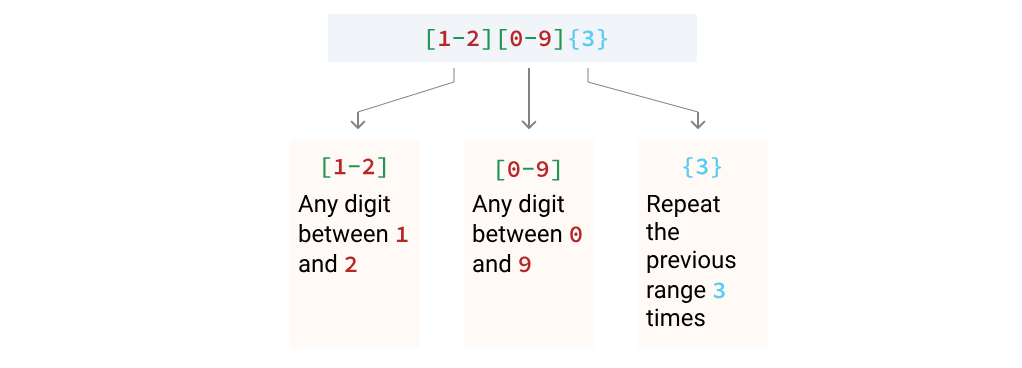

**Quantifiers** specify how many of the previous character our pattern requires, which can help us when we want to match substrings of specific lengths. As an example, we might want to match both `e-mail` and `email`. To do this, we would want to specify to match `-` either zero or one times.

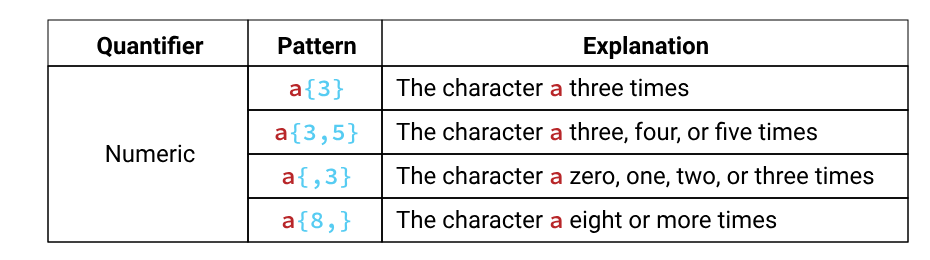

You might notice that the last two examples above omit the **first** and **last** character as wildcards, in the same way that we can omit the first or last indicies when slicing lists.

In addition to **numeric quantifiers**, there are single characters in regex that specify some common quantifiers that you're likely to use. A summary of them is below.

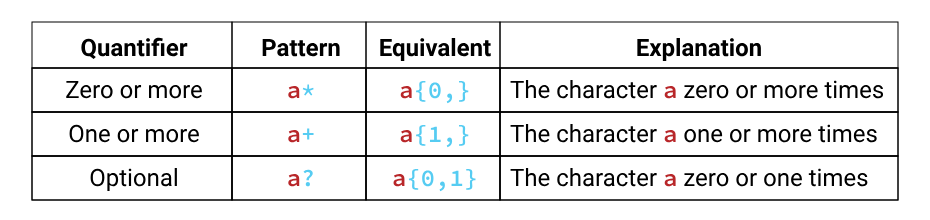





## Instructions

1. Use a regular expression and `Series.str.contains()` to create a boolean mask that matches items from titles containing `email` or `e-mail`. Assign the result to `email_bool`.

1. Use `email_bool` to count the number of titles that matched the regular expression. Assign the result to `email_count`.

1. Use `email_bool` to select only the items from `titles` that matched the regular expression. Assign the result to `email_titles`.

In [ ]:
# The `titles` variable is available from 
# the previous screens

pattern = "e-?mail" #e-mail or email

#find email boolean mask
email_bool =  titles.str.contains(pattern)

#count email titles
email_count = email_bool.sum()

# Return the specified row in title
email_titles =  titles[titles.str.contains(pattern)]+2